In [ ]:
!nvidia-smi

Mon May  6 09:56:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zivcJ5RfjYskuA1urNbJ")
project = rf.workspace("sgs2").project("disease-detection-ktmpg")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Disease-Detection-1 in yolov8:: 100%|██████████| 12324/12324 [00:03<00:00, 3862.45it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=55 imgsz=640 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 262MB/s]
New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Disease-Detection-1/data.yaml, epochs=55, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

In [ ]:
!ls /content/runs/detect/train

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1714989608.b870c1969efd.2180.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch14985.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch14986.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch14987.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


[Errno 2] No such file or directory: '{HOME}'
/content


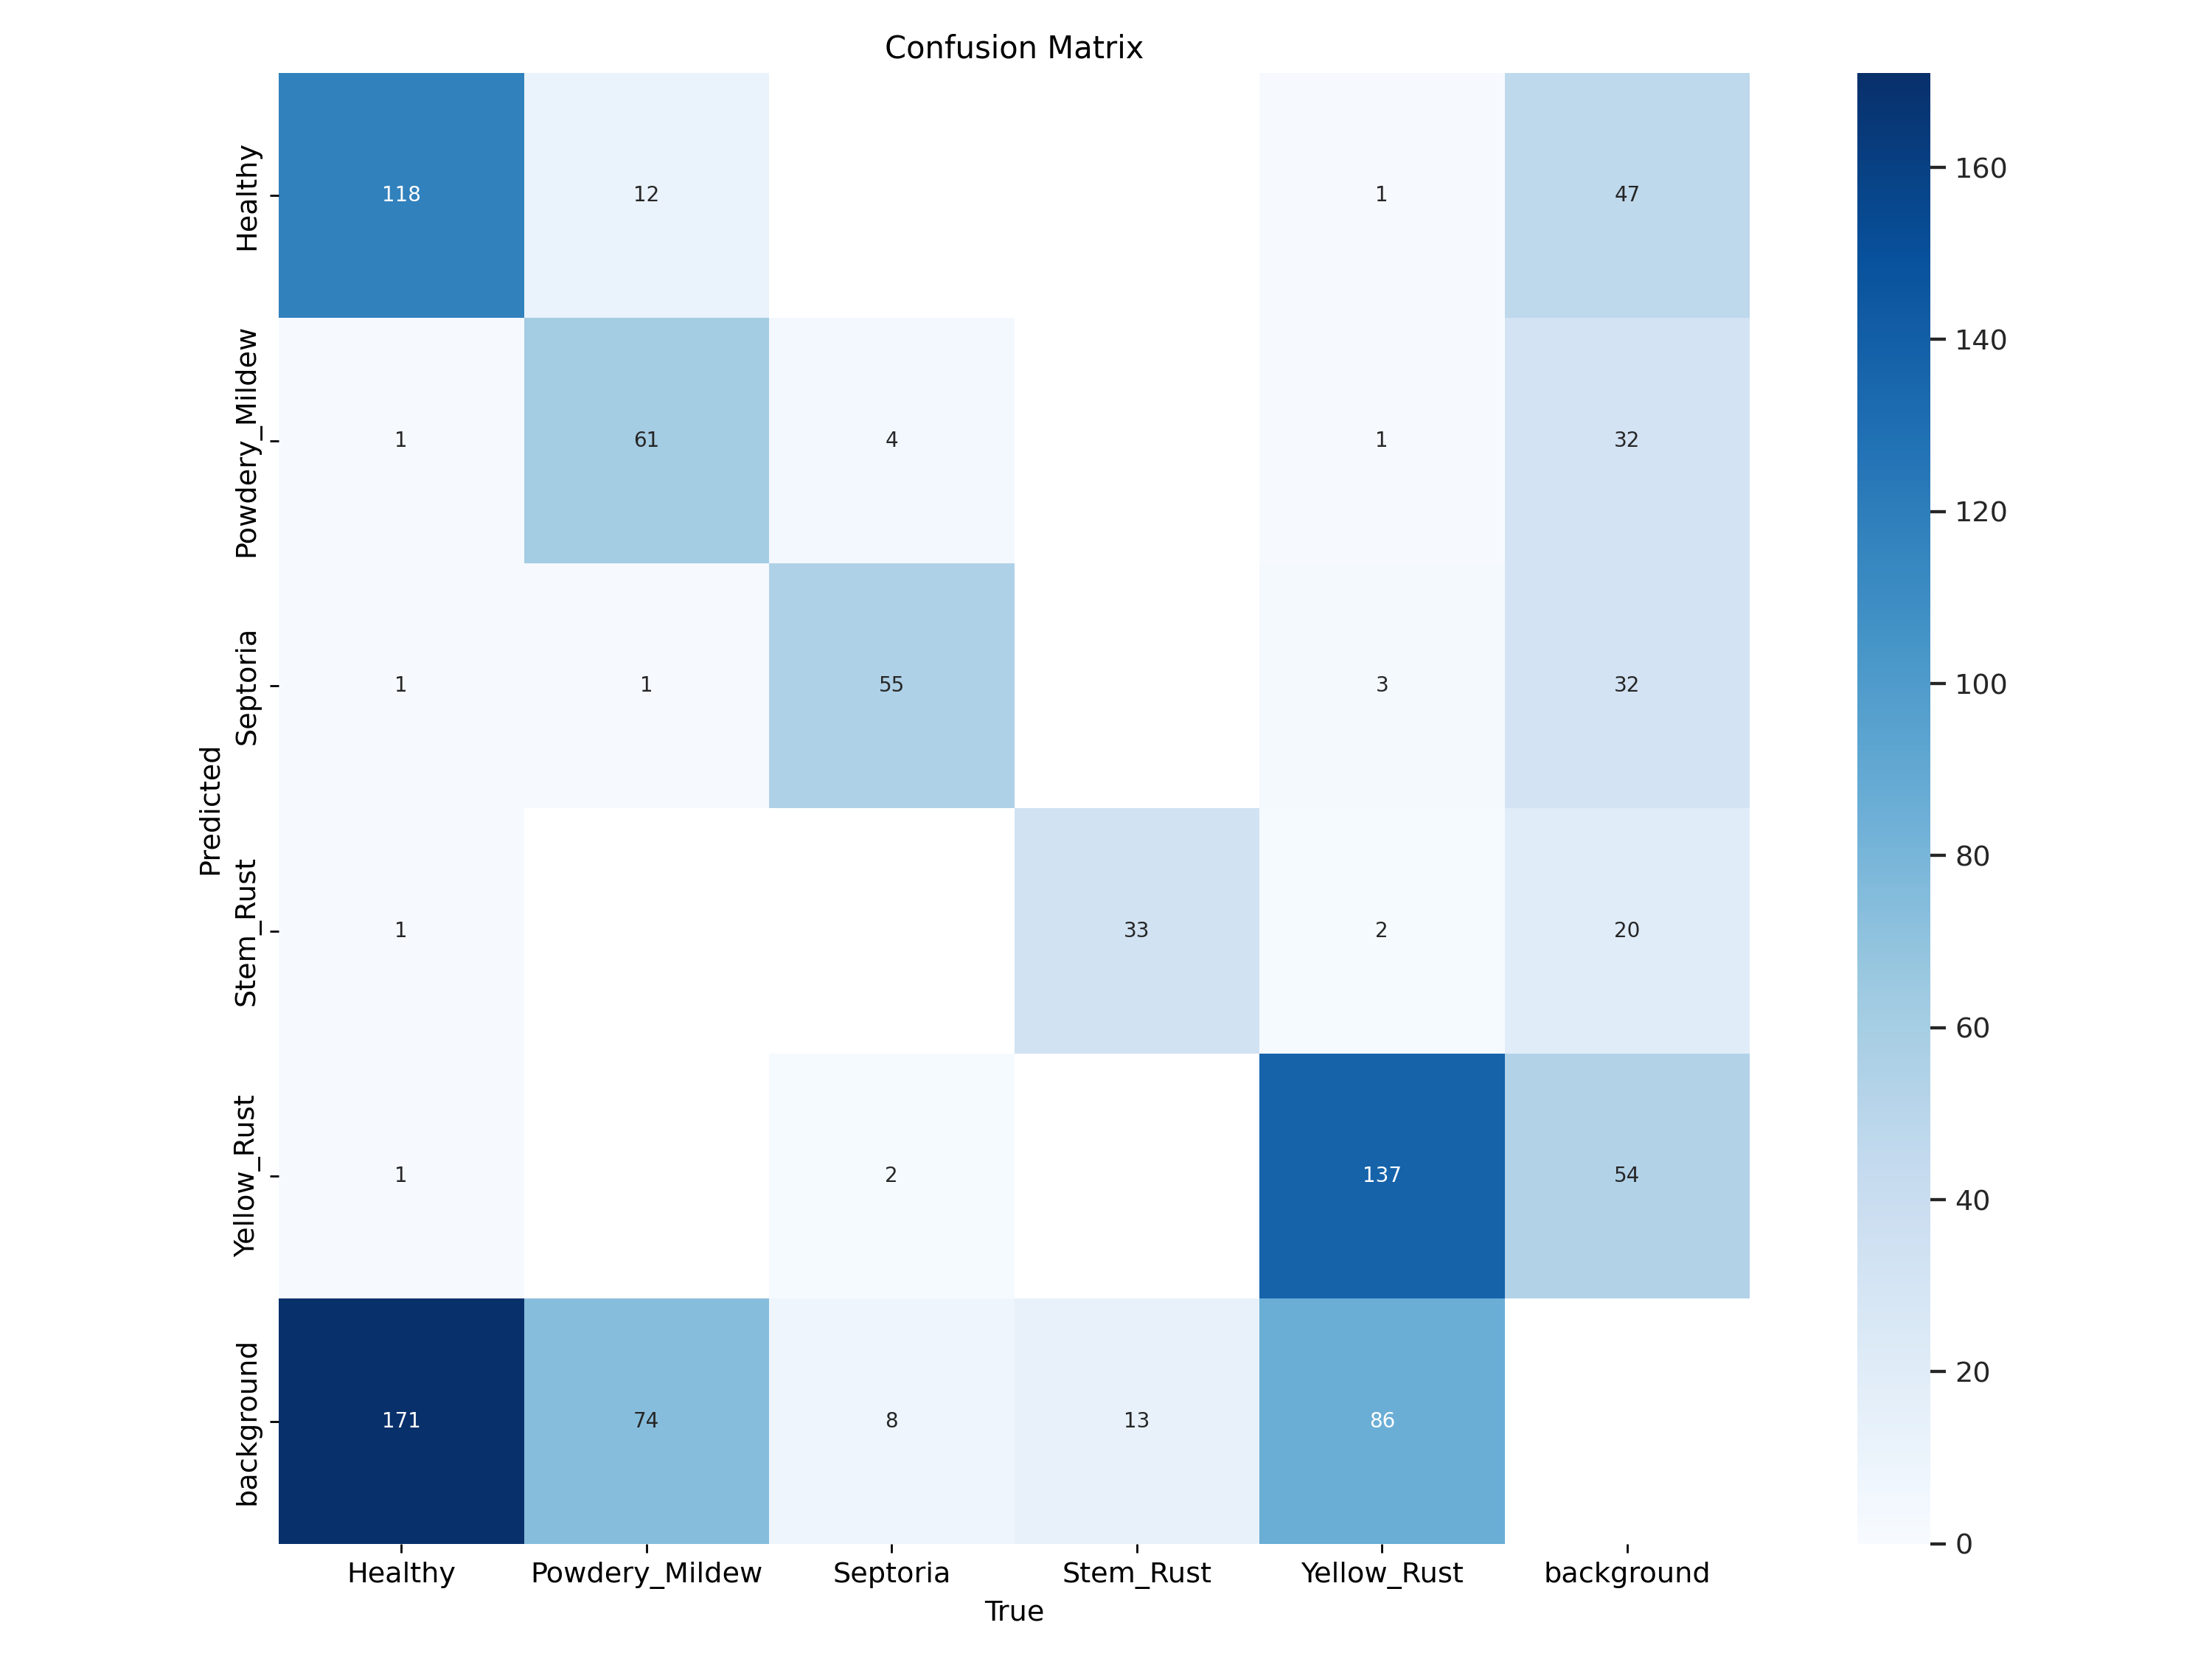

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename='/content/runs/detect/train/confusion_matrix.png', height=600)


[Errno 2] No such file or directory: '{HOME}'
/content


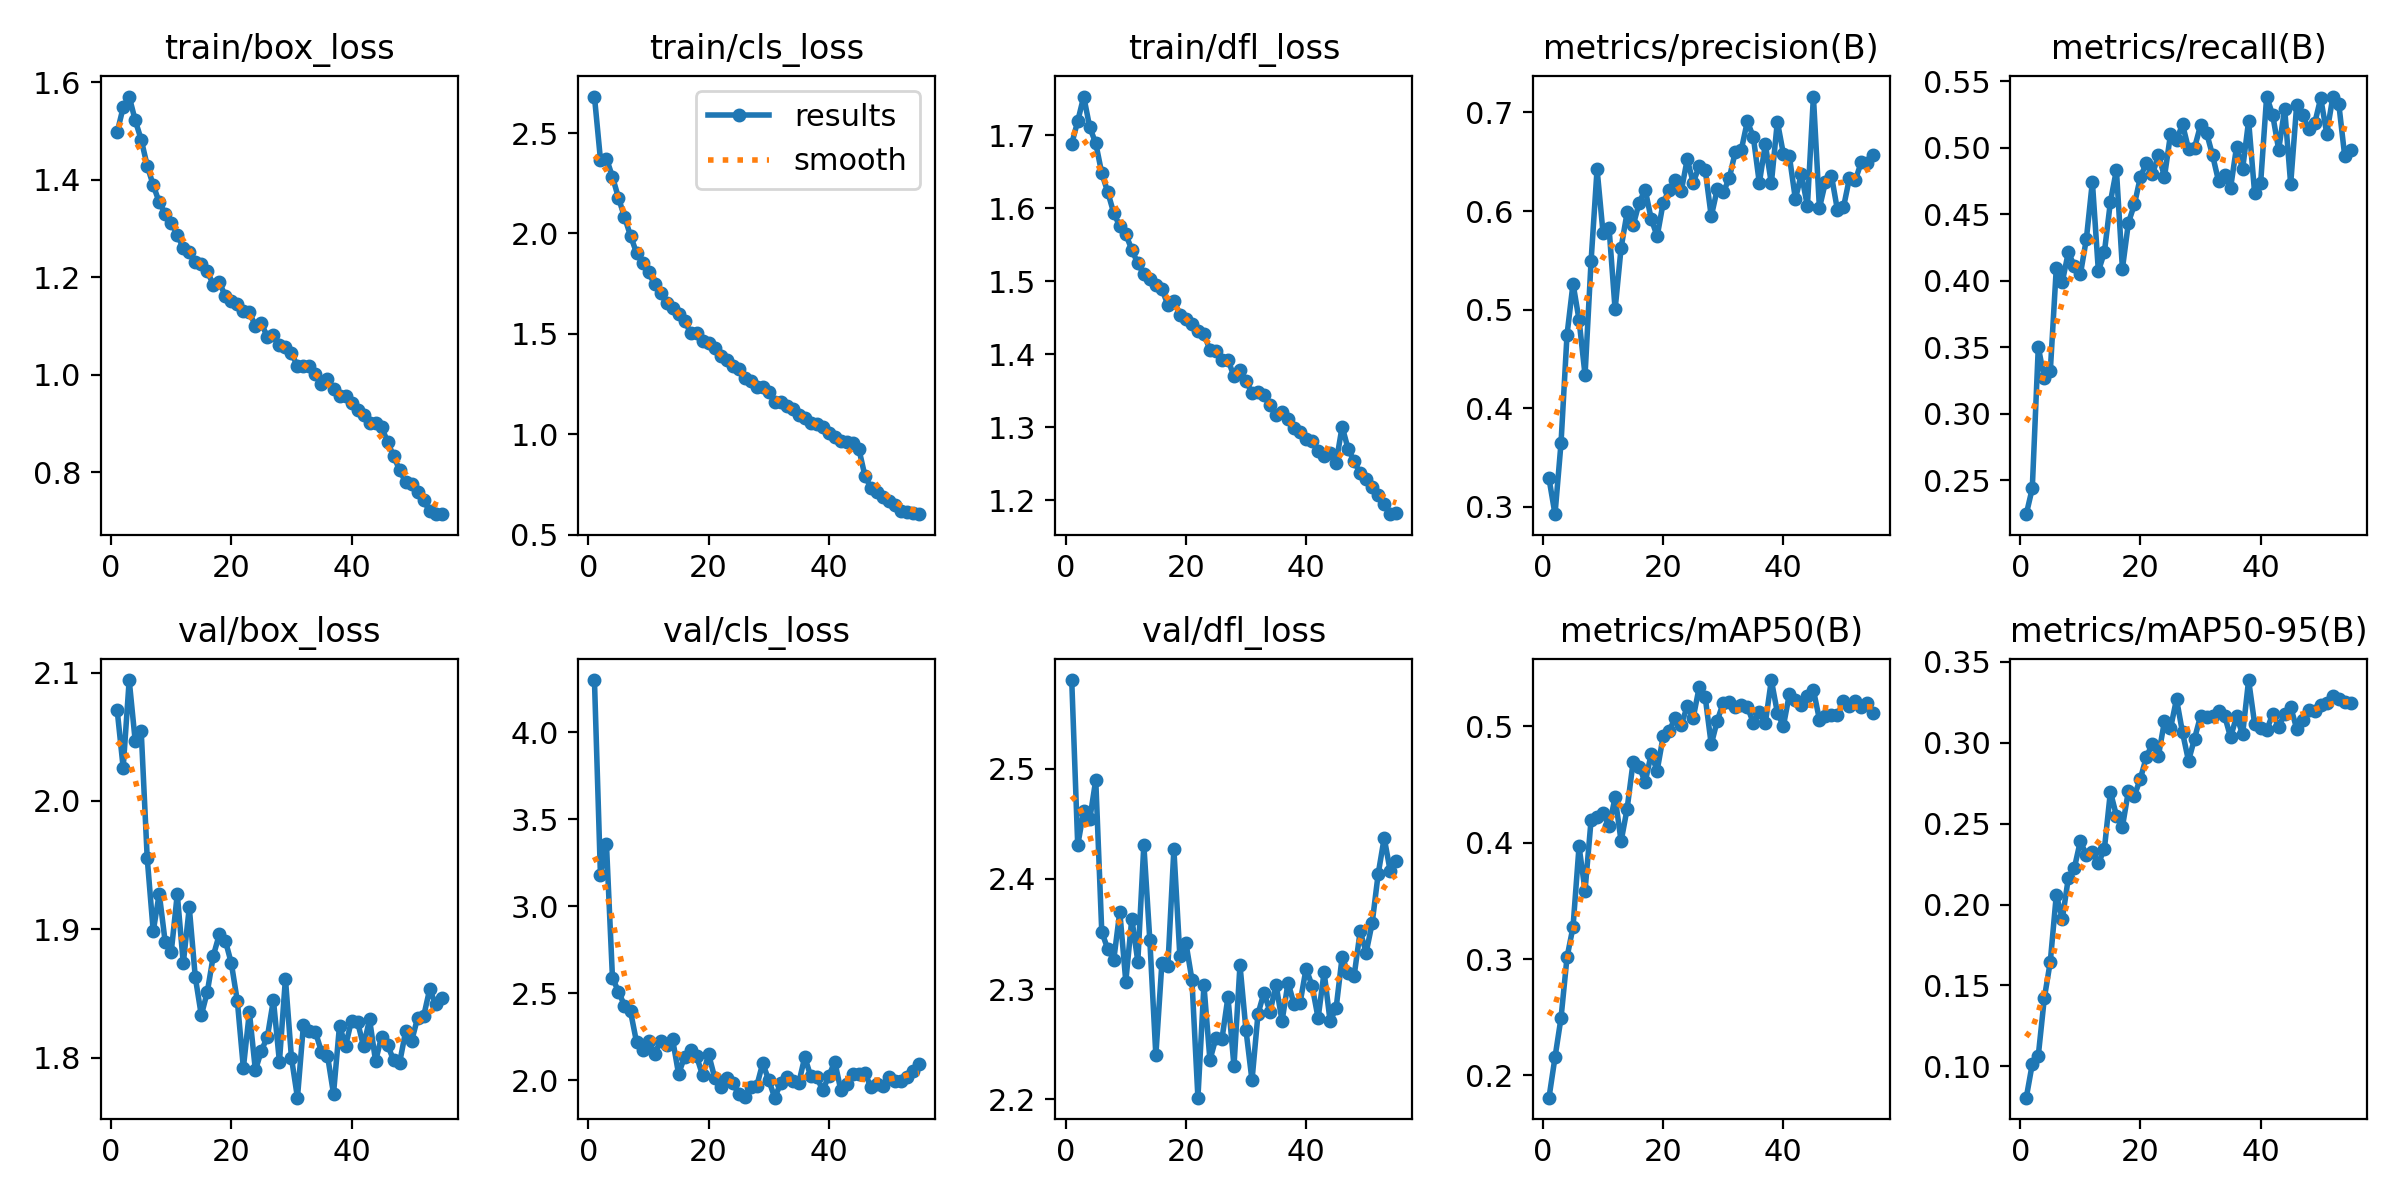

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


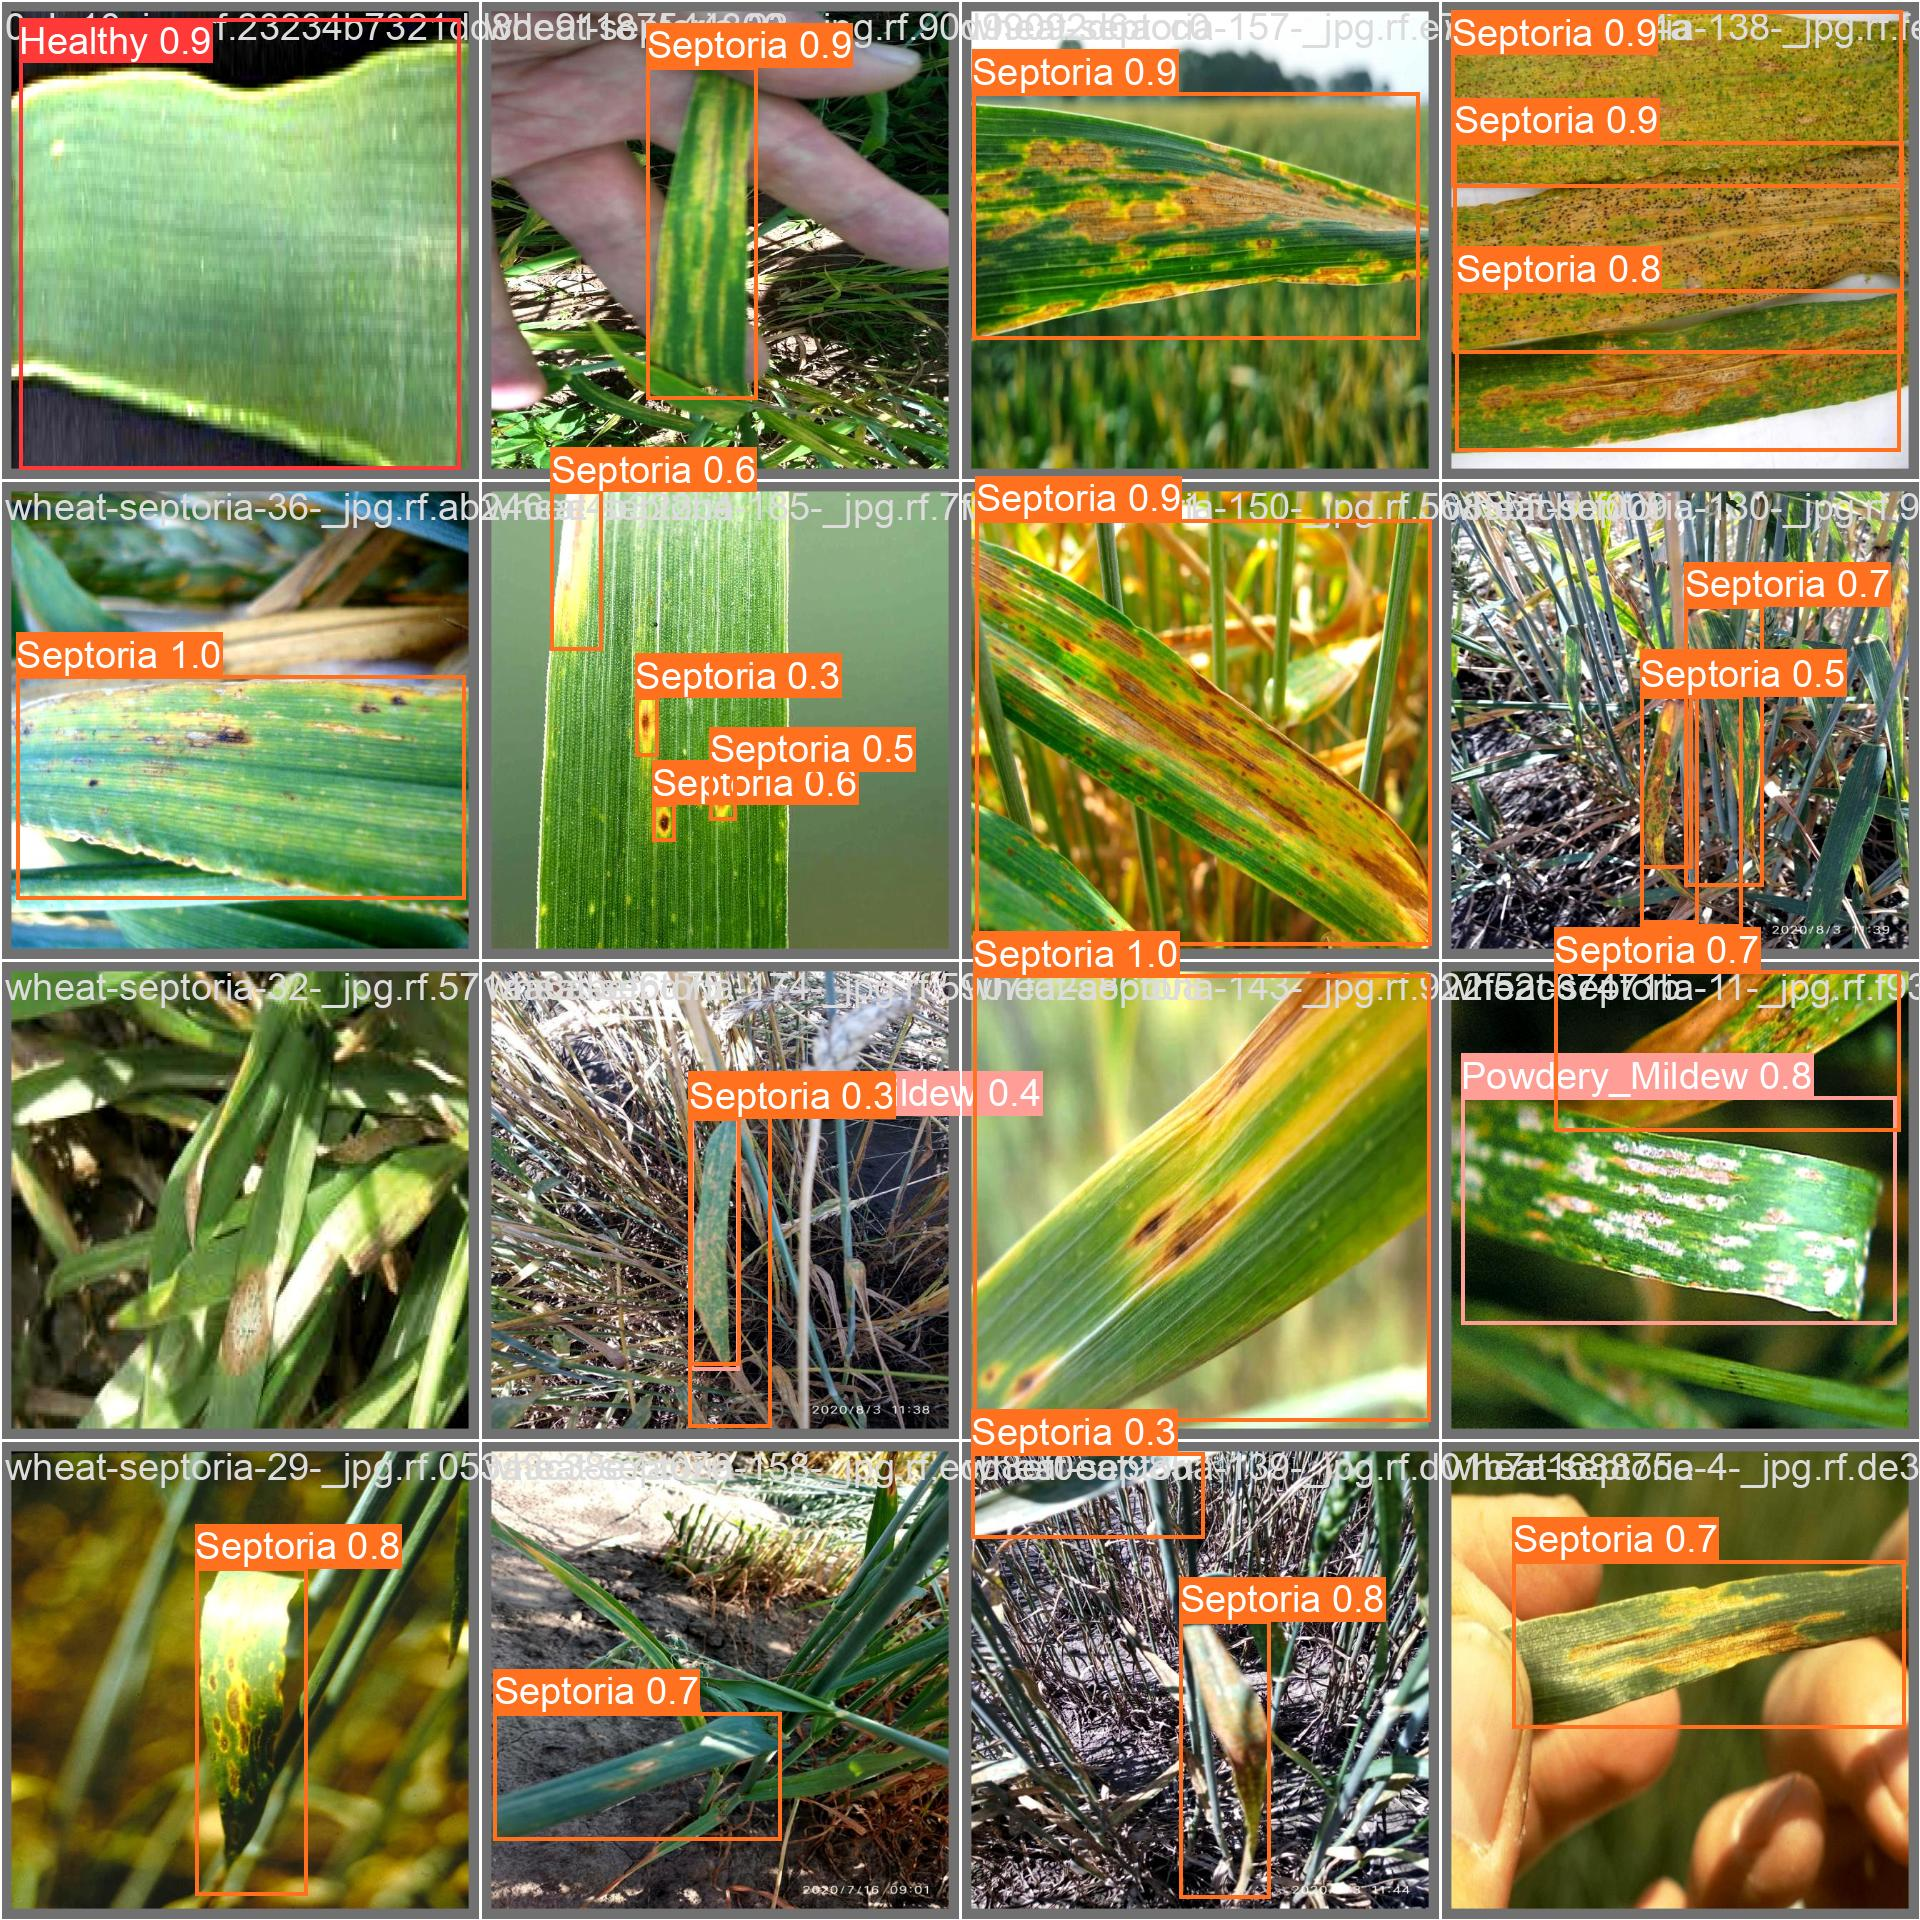

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Disease-Detection-1/valid/labels.cache... 554 images, 0 backgrounds, 0 corrupt: 100% 554/554 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 494, len(boxes) = 786. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 35/35 [00:11<00:00,  3.02it/s]
             

In [ ]:

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.2 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/274 /content/Disease-Detection-1/test/images/00381_jpg.rf.ab51e1ea803547b74aad7b5a844d1520.jpg: 640x640 1 Healthy, 16.4ms
image 2/274 /content/Disease-Detection-1/test/images/00791_jpg.rf.bfad46e6ee604d38a4698a86e76526b2.jpg: 640x640 1 Healthy, 16.4ms
image 3/274 /content/Disease-Detection-1/test/images/01361_jpg.rf.04cb85093a97a331ca07ec763c7cbccf.jpg: 640x640 1 Healthy, 16.3ms
image 4/274 /content/Disease-Detection-1/test/images/01661_jpg.rf.470a28e495ee20e841de9366282d5874.jpg: 640x640 1 Healthy, 16.3ms
image 5/274 /content/Disease-Detection-1/test/images/01861_jpg.rf.2325cdee32dbf8eed33915cf39c8e815.jpg: 640x640 1 Healthy, 16.3ms
image 6/274 /content/Disease-Detection-1/test/images/02151_jpg.rf.90504184f729d56e97561510765ddc75.jpg: 640x640 1 Healthy, 16.3ms
image 7/

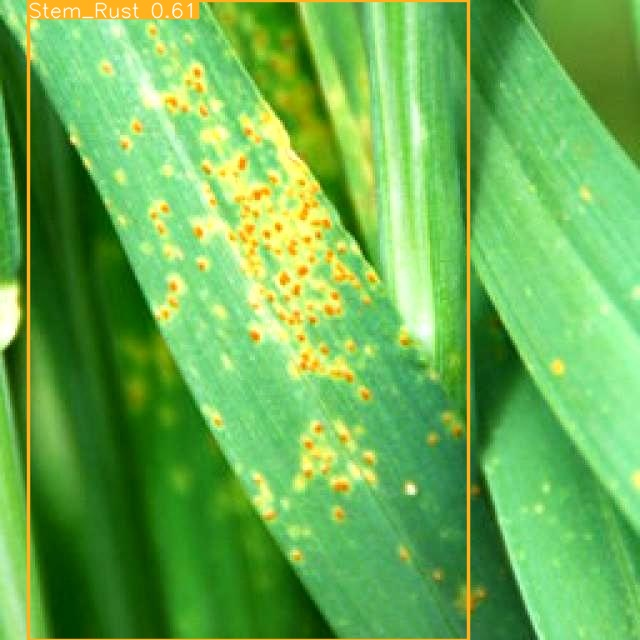

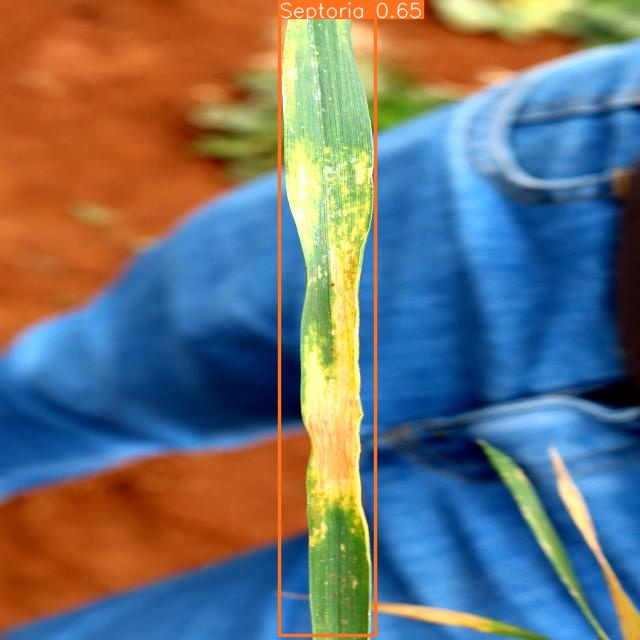

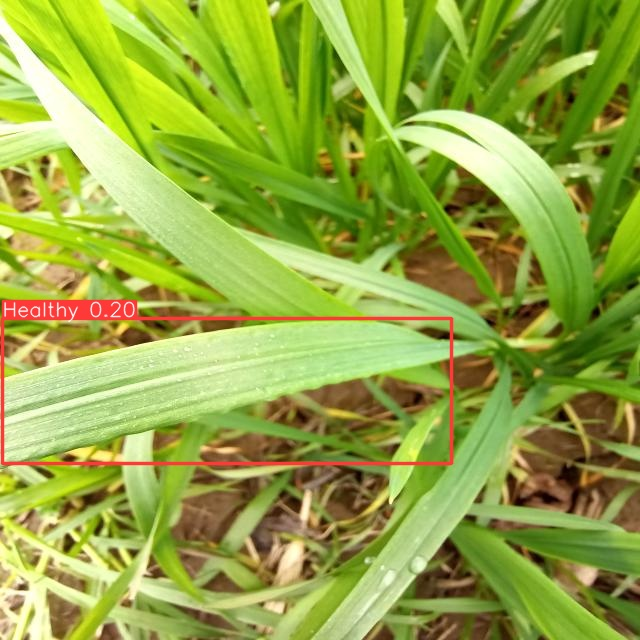

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/wheat/run

/content/drive/MyDrive/wheat/run


In [ ]:
!zip -r runs.zip /content/runs

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 1%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 8%)
updating: content/runs/detect/train/weights/last.pt (deflated 8%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 6%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 6%)
updating: content/runs/detect/train/confusion_matrix_normalized.png (deflated 24%)
updating: content/runs/detect/train/labels_correlogram.jpg (deflated 34%)
updating: content/runs/detect/train/train_batch2.jpg (deflated 1%)
updating: content/runs/detect/train/PR_curve.png (deflated 11%)
updating: content/runs/detect/train/labels.jpg (deflated 16%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 5%)
updating: content/runs/detect/train/args.yaml (defla

In [ ]:
from google.colab import files
files.download('runs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>